# Trex Data Analysis Tutorial
__6. March 2020__

## What you can learn today

We will discuss some common problems in physics data analysis:
* __parameter estimation__, examples:
   * determine your detector resolution
   * obtain calibration coefficients
   
* __hypothesis testing__, examples:
   * is your assumption of a linearity valid?
   * is this process compatible with an exponential law?
   
* __uncertainty calculation__
   * always quote results with uncertainties, e.g. $E = 669 \pm 5$ keV
   * stimate both __statistic__ and __systematic__ uncertainty
   
* __Monte Carlo simulation__, for example:
   * simulate response of photomultiplier tube
   * obtain acceptance of detector with complicated geometry

## Introduction

* Examples in this presentation are based on the programming language __Python__ and libraries from it's ecosystem
* Many alternatives exists, don't hesitate to explore them!
  * __Programming languages__: C++, Julia, R, Matlab, Go, ...
  * __Plotting and data analysis__: gnuplot, ROOT, ..
* This is not an introduction to Python, it assumes you are a bit familiar with it
* There are a lot of resources on the internet:
  * Python website: <https://www.python.org>
  * Python tutorials: <https://docs.python.org/2/tutorial/>
  * Google $\to$ <https://www.stackoverflow.com>

## Software we use in data analysis around Python

The Python ecosystem established itself __the standard__ for modern data analysis, of which you will use today:

* the Python programming language
* the NumPy library for handling numerical data and linear algebra
* the SciPy library for scientific computing
* matplotlib to easily make nice plots
* the Jupyter Notebook to interactively work with Python
  * this presentation is actually a notebook itselt, which you can find here

More specific to High Energy Physics (HEP), there is also ROOT (developed by CERN), a modular scientific software toolkit. It is very useful when performance is key, since it can also be used in C++.

## Reminders about Python

* Syntax is "similar" to English

In [3]:
print("salut tout le monde")

salut tout le monde


* No explicit types for variables

In [4]:
n = 1
s = "one"
print(n, s)

1 one


* Blocks of code (if-else, for loops, ...) are denoted using indentation

In [5]:
number1 = 5.5
number2 = -5.5

if number1 > 0:
    print(number1, "is > 0")
else:
    print(number1, "is <= 0")
    
if number2 > 0:
    print(number2, "is > 0")
else:
    print(number2, "is <= 0")

5.5 is > 0
-5.5 is <= 0


* Lists can contain multiple, ordered, heterogeneous values

In [6]:
mylist = [1, 2, None, 4, "was guckst du"]
for x in mylist:
    print(x)

1
2
None
4
was guckst du


* You can define functions and call them using positional or keyword arguments
* you can also define [classes](https://docs.python.org/3.6/tutorial/classes.html)

In [7]:
def divide(num, den):
    return num/den

x1 = divide(10, 5)
x2 = divide(num=10, den=5)

print(x1, x2)

2.0 2.0


* You can import libraries and use their functionalities:

In [8]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from numpy import matmul as mm
from scipy.stats import chi2

* In the Jupyter notebook, the return value of the last command in the cell is automatically printed

In [9]:
1 + 2 + 3 + 4 + 5 + 6

21

## Pseudorandom numbers

To generate __random data to try out our tools__, we will generate __pseudorandom numbers__.

* number generated by mathematical formulae with statistical properties close to the ones of random numbers.
* a good algorithm should not present a correlation between the generated numbers
* generation of pseudorandom numbers is reporducible: you will get the same numbers if you start from the same seed

_Example_: the __Linear Congruential Generator__ $x_{n+1} = a x_n + c$ mod $m$.

In [10]:
def linear_congruential(size, seed=1, a=7**5, c=0, m=2**31):
    n = np.prod(size)
    x = np.empty(n)
    x[0] = seed
    for i in range(1,n):
        x[i] = (a*x[i-1] + c) % m
    return x.reshape(size) / m

With the wrong choice of $a, c$ and $m$, the __Linear Congruential Generator__ shows an obvious non-random pattern.

In [11]:
x1 = linear_congruential((2,500), seed=1, a=7**5, c=0, m=2**31)
x2 = linear_congruential((2,500), seed=1, a=13, c=0, m=31)

In [12]:
def linear_congruential_plot(x1, x2):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    ax1.scatter(x1[0], x1[1], s=2, color='k')
    ax2.scatter(x2[0], x2[1], s=2, color='k')
    ax1.set_xlim(0,1); ax1.set_ylim(0,1); ax2.set_xlim(0,1); ax2.set_ylim(0,1)
    ax1.set_title(r'$a = 7^5$,   $c=0$,   $m=2^{31}$')
    ax2.set_title(r'$a = 13$,   $c=0$,   $m=31$')
    ax1.set_xlabel(r'$x_1^1$')
    ax1.set_ylabel(r'$x_1^2$')
    ax2.set_xlabel(r'$x_2^1$')
    ax2.set_ylabel(r'$x_2^2$')
    plt.show()

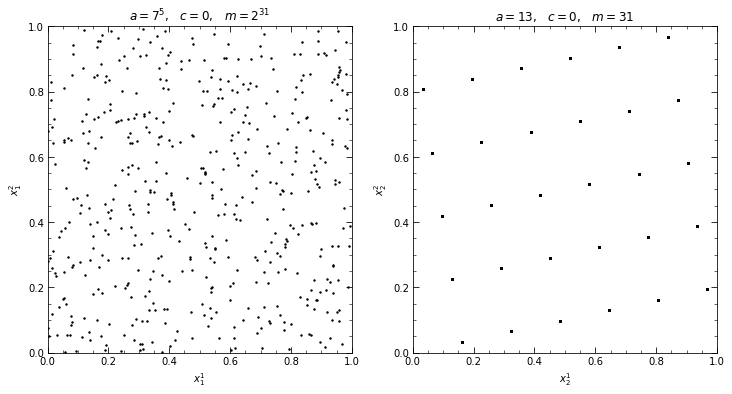

In [13]:
linear_congruential_plot(x1, x2)

## Pseudorandom numbers in Python

Python and numpy use the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) algorithm for pseudorandom number generation. We can set the seed for numpy with `np.random.seed()` to get reproducible results and use the [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html) module to generate arrays of random numbers according to many different probability density functions, for example a __uniform distribution__:

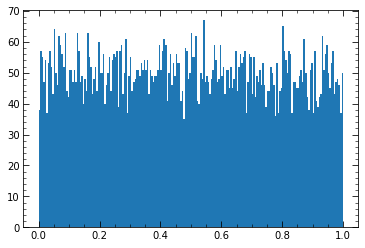

In [14]:
np.random.seed(42)

a = np.random.uniform(size=10000)
plt.hist(a, bins=200)
plt.show()

## Histograms

A __histogram__ is a representation of the distribution of numerical data. The [numpy.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) function returns you the number of counts in each __bin__, with the bins being defined by the __bin edges__ you pass as a second argument.

In [15]:
data = [1, 2, 3, 3, 3, 5, 1, 0, -1, 4]
bins = np.linspace(-6, 6, 21)

np.histogram(data, bins)

(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 3, 1, 0, 1, 0]),
 array([-6. , -5.4, -4.8, -4.2, -3.6, -3. , -2.4, -1.8, -1.2, -0.6,  0. ,
         0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]))

The `numpy.histogram` function returns you:
* the number of counts in each bin
* the bin edges (redundant information here since we already specified them)

You can also fill histograms with random values, here for example according to a __normal distribution__:

In [16]:
a = np.random.normal(loc=0.0, scale=2.0, size=1000)
np.histogram(a, bins)

(array([  1,   2,  12,  21,  28,  47,  66,  82, 112, 112, 122, 101,  96,
         77,  43,  31,  20,  14,   7,   1]),
 array([-6. , -5.4, -4.8, -4.2, -3.6, -3. , -2.4, -1.8, -1.2, -0.6,  0. ,
         0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]))

It's also very convenient to plot histograms directly with the [matplotlib.pyplot.hist](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function, which uses the same interface:

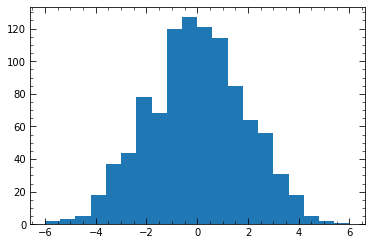

In [17]:
a = np.random.normal(loc=0.0, scale=2.0, size=1000)

plt.hist(a, bins)
plt.show()

However, the  `numpy` function is still very useful in case you want to do something with the counts before plotting, them, for example to calculate the __Poissonian uncertainy__:

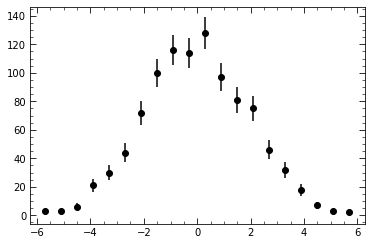

In [18]:
a = np.random.normal(loc=0.0, scale=2.0, size=1000)

counts, _ = np.histogram(a, bins)
uncert = np.sqrt(counts)
bincenters = (bins[1:] + bins[:-1])/2.

plt.errorbar(bincenters, counts, yerr=uncert, fmt='o', color='k')
plt.show()

Having the numpy array with the counts and uncertainties also helps you when you want to __fit your data__ (more on fitting later):

In [19]:
def gaus(x, mu, sigma, N):
    return N * 1./(np.sqrt(2*np.pi)*sigma) * np.exp(-(x - mu)**2/(2*sigma**2))

popt, pcov = curve_fit(gaus, bincenters, counts,
                       sigma=uncert, p0=[1., 1., 1000.], absolute_sigma=True)

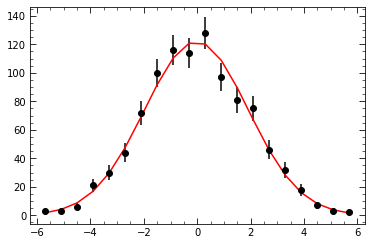

In [20]:
plt.plot(bincenters, gaus(bincenters, *popt), "r")
plt.errorbar(bincenters, counts, yerr=uncert, fmt='o', color='k')
plt.show()

## Fitting data

Let's create some toy data which is distributed according to $121 /\sqrt{2x}$, plus some Gaussian noise.

In [21]:
def f_true(x):
    return 121./np.sqrt(x) + 40.

In [22]:
def f_noise(x):
    return np.sqrt(f_true(x)) * np.random.normal(loc=0.0, scale=1.0, size=x.shape)

In [23]:
def f_measurement(x):
    return f_true(x) + f_noise(x)

In [24]:
x = np.linspace(1., 10., 20)
y = f_measurement(x)
yerr = np.sqrt(y)

In [25]:
def data_and_true_function_plot(x, y, yerr, f_true):
    xx = np.linspace(1.,10.,200)
    plt.plot(xx, f_true(xx), label="true distribution")
    plt.errorbar(x, y, yerr=yerr, fmt='o', color='k', label="data")
    plt.legend(loc="upper right")
    plt.xlabel("Amplitude")
    plt.ylabel("Counts")

In [26]:
def data_plot(x, y, yerr):
    plt.errorbar(x, y, yerr=yerr, fmt='o', color='k', label="data")
    plt.legend(loc="upper right")
    plt.xlabel("Amplitude")
    plt.ylabel("Counts")

This is a visualization of our "measured" data and the underlying function:

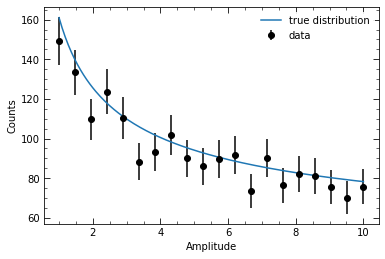

In [27]:
data_and_true_function_plot(x, y, yerr, f_true)
plt.show()

In a real experiment, you find youself rather in the following situation:

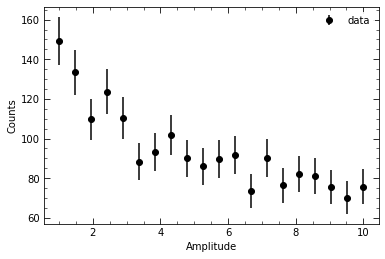

In [28]:
data_plot(x, y, yerr)
plt.show()

You don't know the underlying function! But you want to fit it in order to estimate the parameters $a$ and $b$ in the model $a/\sqrt{bx}$.

How is this done?

### The Likelihood

The fit should give you the model for which the observed data is the most likely:

$$\text{best model} = \text{argmax}_\text{model}~\mathcal{L}(\text{model}),$$
where
$$\mathcal{L}(\text{model}) = P(\text{data}|\text{model}).$$

We often denote a model as an ensemble of model parameters $\theta$, and the parameters of the best model as $\hat\theta$:

$$\hat\theta = \text{argmax}_\theta~\mathcal{L}(\theta)$$

### Fitting with linear least squares

In the case of a __linear model__ $f(x) = \theta_1x + \theta_0$ where the data fluctuates with the measured uncertainties $\sigma_i$ according to a normal distribution:

$$\mathcal{L}(\theta) = \prod_i \frac{1}{\sqrt{2\pi\sigma_i}} \exp\left(\frac{(y_i - \theta_1 x_i + \theta_0)^2}{2\sigma_i^2}\right).$$

We omitted from now on the normalizations of the Gaussians as they have no effect on the position of the minimum $\hat\theta$.

__Note:__ when we talk about a __linear model__, we mean linear in the parameters $\vec\theta$, not the observed $\vec x$ or $\vec y$! For example, a quadratic model $f(x) = \theta_2x*2 + \theta_1x + \theta_0$ is also linear in that sense.

Maximizing $\mathcal{L}$ is equivalent to minimizing $-2\log\mathcal{L}$:

$$-2\log\mathcal{L}(\vec\theta) = -2\log\left(\prod_i \exp\left(\frac{\left(y_i - \theta_1 x_i + \theta_0\right)^2}{2\sigma_i^2}\right)\right) + C = \sum_i \frac{(y_i - \theta_1 x_i + \theta_0)^2}{\sigma_i^2} + C$$

The constant $C$ would be the term from the normalizations, which we can ignore from now. As an exercise, you can find the best fit values $\theta_1$ and $\theta_2$ analytically.

Here, we will recognize the problem as a __weighted linear least squares problem__ and tackle it with linear algebra.

Let us express the problem in matrix notation. The (weighted) least squares are often denoted with $\chi^2$, or "chi-square":

$$ \vec{\hat\theta} = \text{argmin}_\vec\theta~(\vec y - X\vec\theta)^TV^{-1}(\vec y - X\vec\theta) = \text{argmin}_\vec\theta~\chi^2(\vec\theta).$$

The matrix $V$ is a so called __covariance matrix__, which generalizes the notion of variance to multiple dimensions. I our example, $V$ is diagonal because our individual measurements are not correlated:

$$
V = \begin{pmatrix} 
    \sigma_{1}^2 & 0 & \dots \\
    \vdots & \ddots & \\
    0 &        & \sigma_n ^2
    \end{pmatrix}
$$

In [29]:
V = np.diag(yerr**2)

Furthermore, we "extend" the vector $\vec x$ to a matrix $X$, which has one additional column filled with ones to translate our problem of a linear fit __with offset__ to matrix notation:

$$X = \begin{pmatrix}
      1 & x_1 \\
      \vdots & \vdots \\
      1 & x_n 1
      \end{pmatrix}.
$$

In [30]:
X = np.vstack([np.ones_like(x), x]).T

The vectors $\vec y$ and $\vec \theta$ remain the measured values and the vector of model parameters $\vec\theta = \begin{pmatrix}\theta_0 & \theta_1 \end{pmatrix}$ respectively.

We can now find $\vec{\hat\theta}$ analytically as the solution of:

$$X^TV^{-1}X\vec{\hat\theta} = X^TV^{-1}\vec{y},$$

$$A\vec{\hat\theta} = B\vec{y}.$$

We could bring $A$ on the right side by inverting it, but solving a linear equation directly is numerically more stable than inversion and multiplication:

In [31]:
V_inv = np.linalg.inv(V)
A = mm(X.T, mm(V_inv, X)) # we imported numpy.matmul as mm
B = mm(X.T, V_inv)
popt = np.linalg.solve(A, mm(B, y))

Using error propagation, we can find the __covariance matrix of the model parameters__ as folllows:

$$U = (A^{-1}B)V(A^{-1}B)^T = (X^TV^{-1}X)^{-1}.$$

In [32]:
pcov = np.linalg.inv(mm(X.T, mm(V_inv, X)))

You have now see the __linear least squares fit__ and got your first fit result:

In [33]:
print(popt)
print("")
print(pcov)

[126.20477612  -5.93012538]

[[27.51246272 -3.8549498 ]
 [-3.8549498   0.64698973]]


As expected, the covariance matrix is symmetric and positive semidefinite.

Remember that the diagonal elements of the covariance matrix are the __variances of the parameters__, so we just extract the square root of the diagonal to get the uncertainties on the fit paramteres:

In [34]:
puncert = np.sqrt(np.diag(pcov))
print(f"theta_0 is found to be {popt[0]:.1f} ± {puncert[0]:.1f}.")
print(f"theta_1 is found to be {popt[1]:.2f} ± {puncert[1]:.2f}.")

theta_0 is found to be 126.2 ± 5.2.
theta_1 is found to be -5.93 ± 0.80.


As we could already anticipate, the linear fit is not adequate for this example data, so we still have to discuss two questions:
* How can we test the goodness of a fit?
* How can we perform non-linear fits?

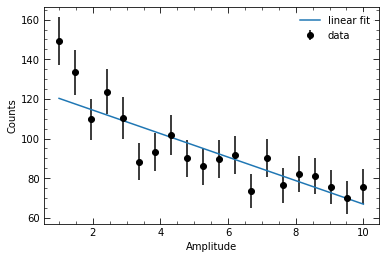

In [35]:
data_plot(x,y, yerr)
plt.plot(x, np.matmul(X, popt), label="linear fit")
plt.legend(loc="upper right")
plt.show()

## Goodness of fit with the Reduced Chi-squared Test

There are many ways to quantify the [goodness of a fit](https://en.wikipedia.org/wiki/Goodness_of_fit). We will look at the __reduced chi-squared test__, which is widely used in HEP. It is actually so common that it is automatically performed when you perform fits in ROOT.

Remember the sum of squares from the previous part, not in matrix notation this time:
$$\chi^2 = \sum_i \frac{(y_i - f(x_i))^2}{\sigma_i^2}.$$

The sum of squares will be distributed according to a [chi-squared distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution) $\chi^2_k$ if the following is true:
* your model $f(x)$ is correct
* your Gaussian uncertainties on the data $\vec{y}$ are correct

The degrees of freedom $k$ is the __number of data points minus the number of model parameters__.

The probability desity function for the $\chi^2$ distribution for different values of $k$:

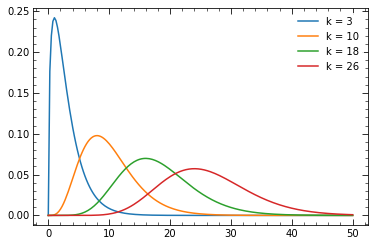

In [36]:
c = np.linspace(0, 50, 200)
for k in [3, 10, 18, 26]:
    plt.plot(c, chi2.pdf(c, k), label=f"k = {k}")
plt.legend(loc="upper right")
plt.show()

In our case, we have 20 data points and 2 model parameter for the linear fit, resulting in 18 degrees of freedom. The __mode__ of the $\chi^2_k$ distribution for $k > 2$ is $k$, so we expect the sum of squared residuals to be around 18 (or in other words, the sum of squares divided by $k$ should be around one).

Let us calculate the reduced sum of squares for our linear fit:

In [37]:
c2 = np.sum((np.matmul(X, popt) - y)**2/yerr**2)
print(f"chi-squared over NDF: {c2/18:.4f}")

chi-squared over NDF: 1.1221


Using the $\chi^2$ distribution, we can calculate the __p-value__:
* probability to get this $\chi^2$ or worse if the model would be correct

We use for this the "survival function" of the $\chi^2$ distribution (one minus the cumulative density function):

In [38]:
print(f"p-value: {chi2.sf(c2, 18):.4f}")

p-value: 0.3218


This probability is actually __not large enough to definitely reject__ our hypeothesis of a $f(x) = \theta_1 x + \theta_0$ function!

## Nonlinear least squares fit

In the general case of a model $f(x)$ which does not depend linearly on the model parameters.
* Least-squares solution can't be found analytically
* Least-squared solution has to be found by iterative minimization algorithm

Two basic minimization algorithms are the [Gauss-Newton algorithm](https://en.wikipedia.org/wiki/Gauss%E2%80%93Newton_algorithm) and [Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).

The [Levenberg–Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm) implements a mixture between the previously mentions adgorithms for better convergence, and is implemented in the [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function.

The return values of `curve_fit` should be familiar now: the optimal parameters and covariance matrix.

__Don't forget to set__ `absolute_sigma=True` __if your uncertainties are given in absolute values!__

In [39]:
def f_model(x, a, b):
    return a/np.sqrt(x) + b

popt, pcov = curve_fit(f_model, x, y,
                       sigma=yerr, p0=[100., 1.], absolute_sigma=True)

We get good estimates for the parameters of our underlying function $f(x) = \frac{a}{\sqrt{x}} + b$:

In [40]:
puncert = np.sqrt(np.diag(pcov))
print(f"a is found to be {popt[0]:.1f} ± {puncert[0]:.1f} (true value is 121)")
print(f"b is found to be {popt[1]:.2f} ± {puncert[1]:.2f} (true value is 40)")

a is found to be 109.5 ± 13.5 (true value is 121)
b is found to be 40.45 ± 6.57 (true value is 40)


Since we now chose the right model, it will fit the data well and give a $\chi^2/k$ close to one and a p-value which is not too small.

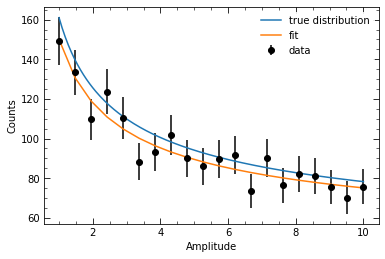

In [41]:
data_and_true_function_plot(x,y, yerr, f_true)
plt.plot(x, f_model(x, *popt), label="fit"); plt.legend(loc="upper right")
plt.show()

In [42]:
c2 = np.sum((f_model(x, *popt) - y)**2/yerr**2)
print(f"chi-squared over NDF: {c2/18:.4f}")
print(f"p-value: {chi2.sf(c2, 18):.4f}")

chi-squared over NDF: 0.4800
p-value: 0.9675


# Detector simulation with Monte Carlo methods

Assume we have three planar detectors on top of each other, detecting cosmic muons:
* figure out which fraction of incoming muons hitting the first detector also hit the second one, or all three detectors
* assume the muons arrive from all directions isotropically (uniform in $\cos(\theta)$ and $\phi$)

We will solve this problem with a __Monte Carlo simulation__, and introduce:
* the pandas library
* Python classes and functions

We create a simple class which should represent a rectangular detector in the $x,y$ plane, and instantiate three of them:

In [43]:
class Detector(object):
    def __init__(self, xmin, xmax, ymin, ymax, z):
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.z = z
    
det0 = Detector(xmin=0., xmax=20., ymin=0., ymax=30., z=0.)
det1 = Detector(xmin=0., xmax=20., ymin=0., ymax=30., z=10.)
det2 = Detector(xmin=0., xmax=20., ymin=0., ymax=30., z=20.)

We create a __pandas DataFrame__, filled with the information of random trajectories with only one simple requirement: they cross the first detector.

In [44]:
n = 1000000
trajectories = pd.DataFrame(data={
    "x0"       : np.random.uniform(det0.xmin, det0.xmax, size=n),
    "y0"       : np.random.uniform(det0.ymin, det0.ymax, size=n),
    "z0"       : det0.z * np.ones(n),
    "costheta" : np.random.uniform(-1., 1., size=n),
    "phi"      : np.random.uniform(0., 2*np.pi, size=n),
})
trajectories["theta"] = np.arccos(trajectories["costheta"])

Data frames let you store multiple arrays of different types in a "spreadsheet-like" manner, let's look at the first three elements:

In [45]:
trajectories.head(3)

,x0,y0,z0,costheta,phi,theta
0,13.752029,29.636646,0.0,0.113874,1.121615,1.456674
1,19.858070,27.205206,0.0,0.406674,3.654852,1.151986
2,7.912936,2.502115,0.0,-0.313498,4.283982,1.889671


We define a function which computes which of the trajectories crosses a certain detector:

In [46]:
def accepted(trajectories, detector):
    t = trajectories
    d = detector

    x = t.x0 + np.tan(t.theta) * np.cos(t.phi) * (d.z - t.z0)
    y = t.x0 + np.tan(t.theta) * np.sin(t.phi) * (d.z - t.z0)

    acc_x = np.logical_and(x >= d.xmin, x < d.xmax)
    acc_y = np.logical_and(y >= d.ymin, y < d.ymax)
        
    return np.logical_and(acc_x, acc_y)

Now we can add new columns to the data frame with the acceptance information. We make also use of __numpy.logical_and__ for the element-wise and of two arrays.

In [47]:
trajectories["accepted_1"] = accepted(trajectories, det1)
trajectories["accepted_2"] = np.logical_and(trajectories["accepted_1"],
                                            accepted(trajectories, det2))

To get the acceptance, we need to:
1. count the occurence of `True` by summing all elements in the `accepted_1` and `accepted_2` columns
2. divide by the total number of trajectories

In [48]:
acceptance_1 = trajectories.accepted_1.sum() / n
acceptance_2 = trajectories.accepted_2.sum() / n
print(f"Muons in acceptance of two detectors: {100*acceptance_1:.2f} %")
print(f"Muons in full detector acceptance: {100*acceptance_2:.2f} %")

Muons in acceptance of two detectors: 32.05 %
Muons in full detector acceptance: 14.86 %


To validate our result, we look at the $\cos(\theta)$ distrubution of the accepted muons:

In [49]:
def make_costheta_plot(trajectories):
    trajectories.costheta.hist(
        bins=200, histtype="step", label="Detector 1")
    trajectories.query("accepted_1").costheta.hist(
        bins=200, histtype="step", label="Detector 1 & 2")
    trajectories.query("accepted_2").costheta.hist(
        bins=200, histtype="step", label="Detector 1 & 3")
    plt.xlabel(r'$\cos{theta}$')
    plt.ylabel("Events")
    plt.legend(loc="upper right")
    plt.show()

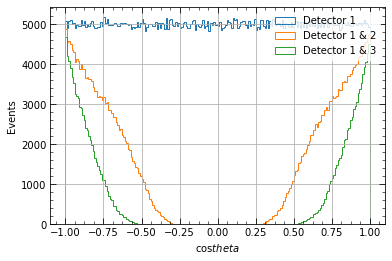

In [50]:
make_costheta_plot(trajectories)

As expected, muons with trajectory parallel to the $x, y$ plane ($\cos(\theta) = 0$) are not able to hit all three detectors, while trajectores straight up or straight down get fully accepted by the detector setup.

## Loading and saving data to files

Pandas data frames are also very convenient to save your data to text files with comma separated values (`.csv` files), or load them. Let's save some of the trajectories from the previous chapter:

In [56]:
trajectories[:100].to_csv("trajectories.csv")

The file will look like this, and can even be opened with a spreadsheet program:

In [57]:
!head -5 trajectories.csv

,x0,y0,z0,costheta,phi,theta,accepted_1,accepted_2
0,13.752028578414674,29.636645544986497,0.0,0.11387431940063308,1.1216148078460713,1.4566744518647299,False,False
1,19.85806981798529,27.205206038797094,0.0,0.40667431328464465,3.654851880235507,1.1519855337306757,True,False
2,7.91293642393425,2.502115479605612,0.0,-0.3134984298336412,4.283981634710009,1.8896712824591113,False,False
3,12.49117271834789,22.223835330087876,0.0,0.7252554458534375,0.2842555388103299,0.7593909761905285,False,False


If you want to read a `.csv` file, this can be done with [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

## Conclusion

What you can take away from this presentation:
* The __Python ecosystem__ is very well suited for data analysis in physics
* How to plot graphs and histograms with __numpy__ and __matplotlib__
* In-depth understanding of __weighted linear least squares__ for parameter estimation
  * Relation between __likelihood__, __chi-square__ and __covariance matrices__
* Goodness of fit with the __reduced chi-square test__
* Fit any function with `scipy.optimize.curve_fit` (non-linear least squares)
* Monte Carlo methods are well suited for detector geometry studies

Look at this presentation online, try the code in the browser or just download and run it!

<https://github.com/guitargeek/trex-analysis-presentation>